
# Configuring and Training a Multi-layer Perceptron (MLP) in SciKit-Learn

**(Notebook prepared by Pr Fabien MOUTARDE, Center for Robotics, MINES ParisTech, PSL Université Paris)**


## 1. Understand and experiment on a VERY simple classification problem

Number of training examples =  270

  first  27 training examples
[  Input_features  ]     [Target_output]
[-0.54360945 -0.30438054] [0. 1.]
[-1.28468144  1.16889587] [1. 0.]
[-0.80405954  1.99323415] [1. 0.]
[-0.20630447  1.43344446] [1. 0.]
[ 0.96059343 -1.01629623] [0. 1.]
[0.78211897 0.72249908] [1. 0.]
[-0.98357905  1.66237311] [1. 0.]
[-0.44088948  0.42597685] [0. 1.]
[-0.44243997  1.18602688] [1. 0.]
[ 0.39143533 -1.51845129] [0. 1.]
[ 0.41641764 -0.14220382] [1. 0.]
[ 1.08294435 -1.18705217] [0. 1.]
[-1.68169466  0.12284415] [1. 0.]
[-0.79963687  0.52705481] [0. 1.]
[-0.27498973  1.699569  ] [1. 0.]
[-1.74098503  1.85741703] [1. 0.]
[0.60446675 0.32234836] [1. 0.]
[ 1.22798406 -1.32615963] [0. 1.]
[-1.77158528  0.09002746] [1. 0.]
[ 0.16896235 -1.92859821] [0. 1.]
[ 0.33525049 -1.47940157] [0. 1.]
[-0.56363723  0.2052237 ] [0. 1.]
[0.42898977 0.54671478] [1. 0.]
[ 0.02021392 -1.23205946] [0. 1.]
[ 1.11535057 -0.48254233] [0. 1.]
[-0.80168756  1.6121614 ] [1. 0.]
[-0.77671798  1

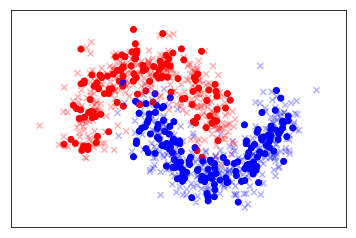

In [11]:
###########################################################################################
# Author: Pr Fabien MOUTARDE, Center for Robotics, MINES ParisTech, PSL Research University
###########################################################################################

%matplotlib inline

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Create artificial dataset (classification problem within 2 classes within R^2 input space)
X, y = make_moons(n_samples=900, noise=0.2, random_state=0)

# Preprocess dataset, and split into training and test part
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

# Encode class labels as binary vector (with exactly ONE bit set to 1, and all others to 0)
Y_train_OneHot = np.eye(2)[y_train]
Y_test_OneHot = np.eye(2)[y_test]

# Print beginning of training dataset (for verification)
print("Number of training examples = ", y_train.size)
print()
print("  first ", round(y_train.size/10), "training examples" )
print("[  Input_features  ]     [Target_output]")
for i in range( int(round(y_train.size/10) )):
    print( X_train[i], Y_train_OneHot[i])

# Plot training+testing dataset
################################
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot the training points...
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
#   ...and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=y_test, cmap=cm_bright, alpha=0.3)

# Define limits/scale of plot axis
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

# Actually render the plot
print()
print("PLOT OF TRAINING EXAMPLES AND TEST DATASET")
print("Datasets: circles=training, light-crosses=test [and red=class_1, blue=class_2]")
print("y_test shape : ",y_test.shape)

plt.ioff()
plt.show()

**Building, training and evaluating a simple Neural Network classifier (Multi Layer Perceptron, MLP)**

The SciKit-learn class for MLP is **MLPClassifier**.
Please first read the [*MLPClassifier documentation*](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifierMLPClassifier); to understand all parameters of the constructor.
You can then begin by running the code block below, in which an initial set of parameter values has been chosen.
** YOU MAY NEED TO CHANGE AT LEAST THE NUMBER OF HIDDEN NEURONS IN ORDER TO BE ABLE TO LEARN A CORRECT CLASSIFIER**


In [122]:
#########################################################
# Create and parametrize a MLP neural network classifier
#########################################################

# Parameters : 
# ===========

nb_hidden_layer = 50
nb_batch_size = 2
nb_max_iter = 300
lr = 0.05


from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(nb_hidden_layer, ), activation='tanh', solver='sgd', 
                    alpha=0.0000001, batch_size=nb_batch_size, learning_rate='constant', learning_rate_init=lr, 
                    power_t=0.5, max_iter=nb_max_iter, shuffle=True, random_state=11, tol=0.000001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.2, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(clf)

# Train the MLP classifier on training dataset
clf.fit(X_train, Y_train_OneHot)
print()

# Evaluate acuracy on test data
score = clf.score(X_test,Y_test_OneHot)
print("Acuracy (on test set) = ", score)




MLPClassifier(activation='tanh', alpha=1e-07, batch_size=2, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.05, max_iter=300, momentum=0.8,
       nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
       solver='sgd', tol=1e-06, validation_fraction=0.2, verbose=True,
       warm_start=False)
Iteration 1, loss = 0.64472970
Iteration 2, loss = 0.58806788
Iteration 3, loss = 0.58696101
Iteration 4, loss = 0.54514881
Iteration 5, loss = 0.50472327
Iteration 6, loss = 0.42308405
Iteration 7, loss = 0.33844007
Iteration 8, loss = 0.35295717
Iteration 9, loss = 0.31344965
Iteration 10, loss = 0.25878842
Iteration 11, loss = 0.26602622
Iteration 12, loss = 0.26863383
Iteration 13, loss = 0.26419072
Training loss did not improve more than tol=0.000001 for two consecutive epochs. Stopping.

Acuracy (on test set) =  0.9428571428571428


Prediction avec comme parametres :LearningRate : 0.05, Epochs : 300, Batch_size : 2, Nb_hidden_layer : 50


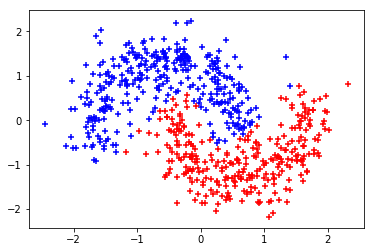

versus véritablement : 


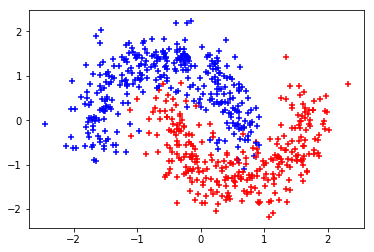

In [123]:
# Plotting our results : 
# =====================
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#0000FF', '#FF0000'])


y_predict = clf.predict(X_test)

Y_predict = []
for t in y_predict:
    if t[0] > 0:
        Y_predict.append(0)
    else:
        Y_predict.append(1)
        
# Contour : 
# ========



        
print("Prediction avec comme parametres :LearningRate : {}, Epochs : {}, Batch_size : {}, Nb_hidden_layer : {}".format(lr,nb_max_iter,nb_batch_size,nb_hidden_layer))

plt.scatter(X_test[:, 0], X_test[:, 1], marker='+', c=Y_predict,cmap=cm_bright)
plt.show()

print("versus véritablement : ")

plt.scatter(X_test[:, 0], X_test[:, 1], marker='+', c=y_test,cmap=cm_bright)
plt.show()

**Visualize the learnt boundary between classes in (2D) input space**

** THIS SHOULD HELP YOU UNDERSTAND WHAT HAPPENS IF THERE ARE NOT ENOUGH HIDDEN NEURONS**

Optional: add code that visualises on the same plot the straight lines corresponding to each hidden neuron (you will need to dig into MLPClassifier documentation to find the 2 input weights and the bias of each hidden neuron). YOU SHOULD NOTICE THAT THE CLASSIFICATION BOUNDARY IS SOME INTERPOLATION BETWEEN THOSE STRAIGHT LINES.

We'll now plot the boundaries between the two classes : 

(630,)


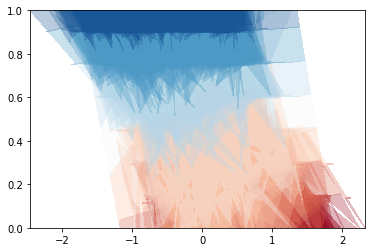

In [118]:
Z = clf.predict_proba(X_test)

print(y_test.shape)

Z.reshape(X_test.shape)
plt.contourf(X_test, y_predict, Z,cmap=plt.cm.RdBu, alpha=0.3)
plt.show()


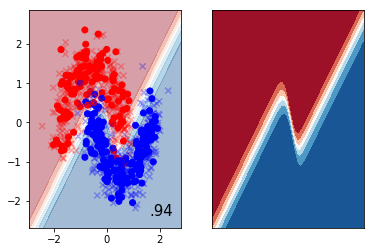

In [136]:
# Plot the decision boundary. For that, we will assign a color to each
#   point in the mesh [x_min, x_max]x[y_min, y_max].


fig, axes = plt.subplots(1,2)
ax = axes[0]
ax1 = axes[1]
cm_bright = ListedColormap([ '#FF0000','#0000FF'])


h = .02  # Step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# Compute class probabilities for each mesh point
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)
# Plot also the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=y_test, cmap=cm_bright, alpha=0.3)

# Axis ranges 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

# Print acuracy on plot
ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')


ax1.contourf(xx, yy, Z, cmap=cm, alpha=1)
plt.show()



94% Accuracy obtained with the following parameters : 

LearningRate : 0.05, Epochs : 300, Batch_size : 2, Nb_hidden_layer : 50

Now, **check, by changing MLPClassifier parameters above and then rerunning training+eval+plot, the impact of main learning hyper-parameters:**
- **number of neurons on hidden layer**: if too small, an acceptable boundary cannot be obtained
- **number of iterations**: if too small, the training does not finish to converge; if too large, overfitting may occur
- **learning_rate, momentum, and solver**
- **impact of L2 weight regularization term (alpha)**


### **Finally, use grid-search and cross-validation to find optimal set of learning hyper-parameters (see code below).**

**Because the values of learning hyper-parameters can DRASTICALLY change the outcome of training, it is ESSENTIAL THAT YOU ALWAYS MAKE SURE TO USE OPTIMAL VALUES FOR THE ALGORITHM HYPER-PARAMETERS. And this ABSOLUTELY NEEDS TO BE DONE USING "VALIDATION", either with a validation set separate from the training set, or using cross-validation. CROSS-VALIDATION is the MOST ROBUST WAY OF FINDING OPTIMIZED HYPER-PARAMETRS VALUES, and the GridSearchCV function of SciKit-Learn makes this rather straightforward.**

**WARNING:** GridSearchCV launches many successive training sessions, so **can be rather long to execute if you compare too many combinations**

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

param_grid = [
  {'hidden_layer_sizes': [(5,), (10,), (15,), (25,)], 
   'learning_rate_init':[0.003, 0.01, 0.03, 0.1],
   'alpha': [0.00001, 0.0001, 0.001, 0.01]}
 ]
#print(param_grid)

# Cross-validation grid-search
scores = ['precision', 'recall']
for score in scores:
    clf = GridSearchCV( MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.005, max_iter=500, momentum=0.8,
       nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
       solver='adam', tol=1e-05, validation_fraction=0.3, verbose=False,
       warm_start=False), 
       param_grid, cv=3, scoring='%s_macro' % score)
    
    clf.fit(X_train, Y_train_OneHot)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
           % (mean, std * 2, params))
    print()
    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = Y_test_OneHot, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

Best parameters set found on development set:

{'alpha': 1e-05, 'hidden_layer_sizes': (25,), 'learning_rate_init': 0.003}

Grid scores on development set:

0.883 (+/-0.094) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.003}
0.902 (+/-0.132) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.01}
0.920 (+/-0.145) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.03}
0.918 (+/-0.139) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.1}
0.917 (+/-0.142) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.003}
0.917 (+/-0.138) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.01}
0.957 (+/-0.008) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.03}
0.962 (+/-0.041) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.1}
0.919 (+/-0.134) for {'alpha': 1e-05, 'hidden_layer_sizes': (15,), 'learning_rate_init':

## 2. WORK ON A REALISTIC DATASET:  A SIMPLIFIED HANDWRITTEN DIGITS DATASET

**Please FIRST READ the [*Digits DATASET DESCRIPTION*](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py).**
In this classification problem, there are 10 classes, with a total of 1797 examples (each one being a 64D vector corresponding to an 8x8 pixmap). 

**Assignment #1: find out what learning hyper-parameters should be modified in order to obtain a satisfying MLP digits classifier**

**Assignment #2: modify the code below to use cross-validation and find best training hyper-parameters and MLP classifier you can for this handwritten digits classification task.**

**Assignment #3: plot the first layer of weights as images (see explanations and example code at http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html)**


In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_openml
print("Starting...")
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

digits = load_digits()
n_samples = len(digits.images)
print("Number_of-examples = ", n_samples)

param_grid = [
  {'hidden_layer_sizes': [(10,), (50,), (100,)], 
   'learning_rate_init':[0.003, 0.01, 0.03, 0.1],
   'alpha': [0.00001, 0.0001, 0.001, 0.01]}
 ]
print("Parameters grid : ",param_grid)
import matplotlib.pyplot as plt
#print("\n Plot of first example")
#plt.gray() 
#plt.matshow(digits.images[0]) 
#print("CLOSE PLOT WINDOW TO CONTINUE")
#plt.ioff()
#plt.show()

# Flatten the images, to turn data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))
X = data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # We hold out 20% of the trainid data for validation

print("Testing Shape")
print("X_train shape : {}, X_test shape : {}, y_train shape : {}, y_test shape : {}".format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))
print(y_test)
print("Starting the cross validation :")
######################################################

#####################################################

# Cross-validation grid-search
scores = ['precision', 'recall']
for score in scores:
    clf = GridSearchCV( MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.005, max_iter=500, momentum=0.8,
       nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
       solver='adam', tol=1e-05, validation_fraction=0.3, verbose=False,
       warm_start=False), 
       param_grid, cv=3, scoring='%s_macro' % score)
    
    clf.fit(X_train,y_train)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
           % (mean, std * 2, params))
    print()
    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    
    
#########################################



Starting...
Number_of-examples =  1797
Parameters grid :  [{'hidden_layer_sizes': [(10,), (50,), (100,)], 'learning_rate_init': [0.003, 0.01, 0.03, 0.1], 'alpha': [1e-05, 0.0001, 0.001, 0.01]}]
Testing Shape
X_train shape : (1437, 64), X_test shape : (360, 64), y_train shape : (1437,), y_test shape : (360,)
[5 4 4 5 1 2 3 7 1 4 2 5 4 0 3 1 0 7 2 8 1 1 2 3 4 8 2 1 1 3 4 9 1 6 6 6 3
 0 7 3 8 4 3 8 9 8 6 3 3 3 3 4 4 7 3 7 9 8 0 7 4 6 1 6 1 3 5 9 0 8 5 2 1 8
 5 7 8 8 6 2 1 6 5 1 2 2 9 8 7 4 3 3 3 0 5 2 5 5 5 3 1 7 6 0 9 8 4 3 9 8 2
 9 1 7 3 9 5 7 9 2 6 4 8 5 8 4 7 1 6 7 7 7 0 8 3 9 6 3 2 8 2 4 6 8 9 0 4 2
 6 9 1 0 4 3 6 7 7 4 9 1 6 9 4 3 3 2 0 4 0 6 2 5 4 6 9 5 5 1 5 9 0 1 5 4 9
 1 5 6 0 3 6 4 5 4 8 3 9 8 1 2 5 7 4 4 0 3 9 9 4 0 3 8 4 0 8 2 5 1 3 1 6 0
 2 5 8 5 0 8 2 3 0 8 1 2 5 5 2 6 9 9 0 4 4 3 1 1 5 9 5 7 7 8 5 6 9 8 1 5 8
 9 8 9 2 2 9 1 7 9 5 2 1 6 2 3 0 4 5 8 1 9 6 1 2 4 3 9 9 5 3 7 5 0 5 0 6 6
 1 4 9 8 1 1 7 4 1 4 2 1 5 6 5 4 3 4 1 6 6 3 0 7 9 2 3 4 5 8 6 9 8 2 3 1 3
 1 6 1 0 8 7 1 2

/Users/paulgarnier/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/paulgarnier/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/paulgarnier/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/paulgarnier/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_f

/Users/paulgarnier/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/paulgarnier/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/paulgarnier/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/paulgarnier/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_f

/Users/paulgarnier/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/paulgarnier/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/paulgarnier/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/paulgarnier/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_f

Best parameters set found on development set:

{'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.003}

Grid scores on development set:

0.934 (+/-0.020) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.003}
0.839 (+/-0.094) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.01}
0.284 (+/-0.421) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.03}
0.010 (+/-0.000) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.1}
0.941 (+/-0.011) for {'alpha': 1e-05, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.003}
0.834 (+/-0.034) for {'alpha': 1e-05, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01}
0.387 (+/-0.220) for {'alpha': 1e-05, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.03}
0.033 (+/-0.033) for {'alpha': 1e-05, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.1}
0.952 (+/-0.014) for {'alpha': 1e-05, 'hidden_layer_sizes': (100,), 'learning_rate_

Now that the best parameters are known, we will use them to display the first layer weights : 

Training set score: 0.976340
Test set score: 0.961111


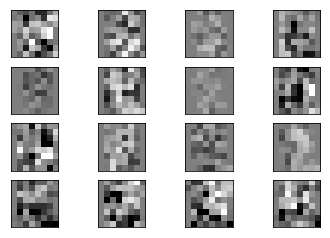

In [19]:

clf = MLPClassifier(activation='tanh', alpha=0.001, batch_size=4, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.003, max_iter=1500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
       solver='adam', tol=1e-05, validation_fraction=0.3, verbose=False,
       warm_start=False)


clf.fit(X_train, y_train)
print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = clf.coefs_[0].min(), clf.coefs_[0].max()
for coef, ax in zip(clf.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8,8), cmap=plt.cm.gray, vmin=.5 * vmin,vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()